In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver

import time as t

# - 부경대 웹 홈페이지에서 공지사항 데이터들을 뽑아보자

아마 많은 부경대 학생들이 관심가지고 있는 분야일 듯 합니다

부경대에는 학생들을 위한 좋은 프로그램들이 굉장히 많습니다<br>
문제는 어떤 프로그램이 어디에서 공고가 나오는 지 알 수 없어 일일히 부경대 홈페이지에 접속해서<br>
공지사항을 매번 들여다봐야하는 문제점이 있죠

저는 여기에 착안하여 공지사항 제목 / 작성자 / 날짜를 빠르게 웹 크롤링으로 추출하고<br>
검색어에 맞는 공지사항들만 또 빠르게 출력할 수 있도록 해보겠습니다

***

참고로 저번에는 크롬을 사용하였는데, 알고보니 IE와 엣지도 사용가능하더라고요<br>
그래서 이번에는 엣지 브라우저로 해보겠습니다

시간이 난다면 IE 드라이버로도 해보는 것도 괜찮을 것 같네요...<br>
필요 라이브러리는 저번과 동일하니까 그대로 진행하시면 될거에요

In [ ]:
base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

사실 이 프로그램은 생각보다 일찍부터 생각해온 프로그램입니다만<br>
한 가지 굉장히 난해한 문제점이 있었습니다

바로 부경대학교 홈페이지는 접속 URL이 처음에는 링크가 잘 뜨지만<br>
2페이지 / 3페이지 탐색하다보면 접속 URL이 http://www.pknu.ac.kr/usrBoardActn.do 로 고정되어버립니다<br>

뷰티풀수프와 requests 모듈을 조합해서 쓸 경우에는 링크가 각각 다르게 들어가야하는데<br>
이렇게 링크가 고정되어 버리면 아예 접속 자체가 불가능하죠

물론 전페이지 정보 (=나는 어디 페이지에서 왔다) 라는 정보를 주고 시작하면 어떻게 될 듯 싶지만<br>
그렇게 하다가는 결국 난해할 것 같아서...

***

저번 시간에도 언급했지만 이런 경우에는 역시나 셀레니움으로 처리하는 게 가장 편합니다<br>
덤으로 동작도 처리할 수 있고요

In [7]:
find_data = input("검색할 단어를 입력하세요 : ")
limit_num = int(input("탐색할 페이지의 수를 입력하세요 : "))

검색할 단어를 입력하세요 : 22
탐색할 페이지의 수를 입력하세요 : 3


우선 우리가 찾을 단어와 탐색할 페이지의 수를 저장합시다

뭐 과정이 완료되고 나서 진행해도 괜찮을 것 같으니<br>
각자 편하신대로 진행하시면 될 것 같아요

In [11]:
driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)

t.sleep(5)

엣지 드라이버 경로는 다음과 같습니다<br>
https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/

아마 여러분들 윈도우 10 쓰고계시면 엣지는 기본적으로 설치되어 있으니<br>
따로 하실 필요는 없으실 거에요

저번과 마찬가지로 webdriver 폴더를 생성해서 우리가 받은 엣지 드라이버 파일을 넣어줍시다<br>

***

참고로 현재 쓰시고있는 엣지 버전과 반드시 호환되는 드라이버 파일을 다운받아서 쓰시길 바랍니다<br>
저는 현재 85버전이라고 뜨네요

확인 방법은 크롬과 거의 유사합니다<br>
설정에서 Microsoft Edge 정보 탭으로 들어가시면 됩니다

In [10]:
t.sleep(5)

부경대 웹 페이지도 로드가 조금 느린데<br>
엣지로 해보니 조금 더 느리더라고요

그래서 충분히 로드될 수 있도록 시간을 여유롭게 줍시다

In [ ]:
# while 1:
#     t.sleep(1)

이제 데이터를 추출하는 작업을 해봅시다

다만 저번 Genie 데이터를 뽑았을 때는 우리가 가야할 페이지의 수가 정해져 있었지만<br>
이번에는 우리가 몇 페이지나 가야할 지 입력을 받아야 아는 상황입니다

흠 근데 다시 코드를 들여다보니, for문으로 처리하는 방안도 괜찮아 보이네요
일단은 while문으로 처리해보겠습니다

***

참고로 작업의 첫 시작은 웹 페이지 로드이기 때문에 sleep 함수를 꼭 넣어주는 걸 잊지마세요

In [ ]:
#     html = driver.page_source
#     soup = BeautifulSoup(html,"html.parser")

저번과 마찬가지로, HTML 코드를 불러온 다음 이제 구문 분석을 위해 soup에 저장한 다음<br>
웹 페이지가 잘 켜지는 지 확인해봅시다

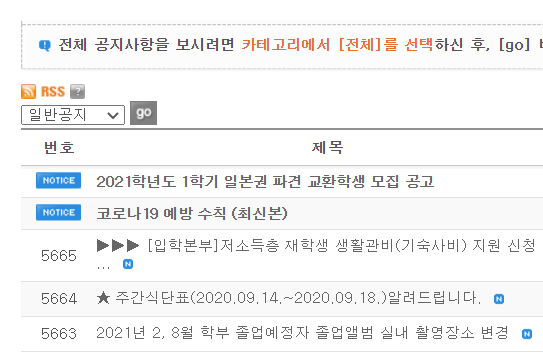

In [12]:
from IPython.display import Image

Image("img/pic1.png")

# - 잠깐 여기서 코드 수정
* *현재 상단의 코드들을 안 따라하셔도 됩니다*

오래전 코드를 다시 불러와서 해보니 문제가 있네요

우선 while문으로 무한 루프가 걸릴 것 같다는 문제도 마음에 좀 걸렸는데<br>
처음 웹 페이지를 켜면 전체 공지가 뜨는 것이 아니라 일반 공지로 들어가버리는 문제가 있습니다

이러면 우리가 원하는 갖가지 정보들을 수집하기가 곤란하니 일단은 하나 하나 고쳐보겠습니다

***

우선은... 지금 해야하는 일은 다음과 같네요

 - 일반공지 콤보 상자에서 전체 선택 - go 버튼 클릭
 - while문에서 for문으로 고치기
 - 데이터 수집하기

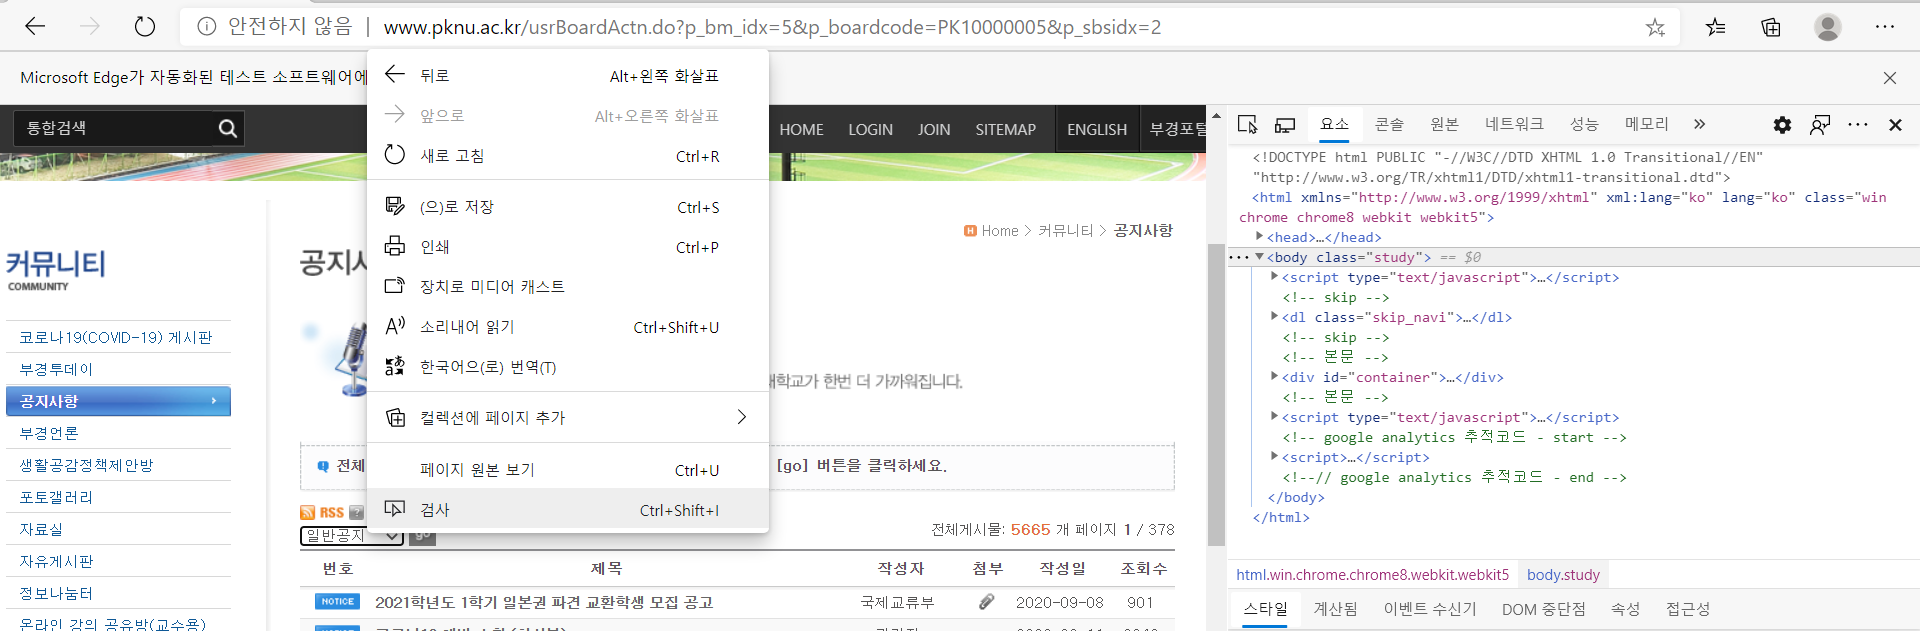

In [13]:
Image("img/pic2.png")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

우선 어떤 친구인지 알아보기 위해 콤보 상자 위에서 우클릭 - 검사를 눌러줍시다<br>
참고로 저는 두번 검사 버튼 누르니까 제대로 나오더라고요

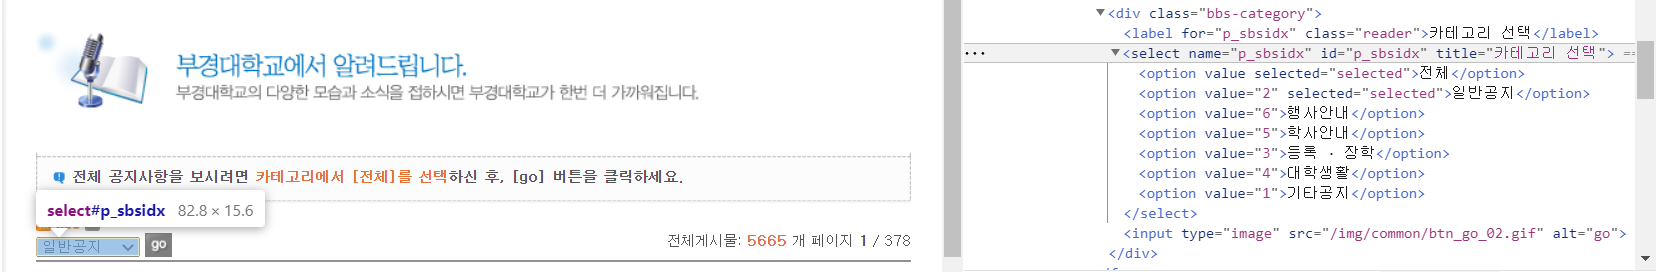

In [15]:
Image("img/pic3.png")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

어디보자... 옵션별로 값이 있는 형태인데 일반공지랑 전체가 둘 다 selected로 되어있네요<br>
이런 걸 볼 때마다 뭔가 싶습니다... 굉장히 너무나도 난해한...

일단은 콤보 상자를 클릭해야 하니까 CSS를 알아내는 게 첫번째겠군요<br>
근데 이미 저번 시간에 CSS를 썼었으니 이번에는 Xpath로 한번 조작해봅시다

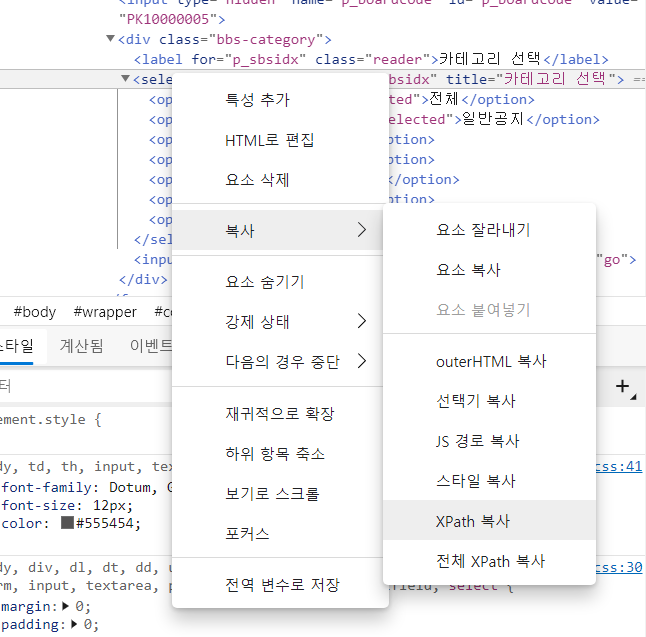

In [16]:
Image("img/pic4.png")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

해당 요소에 우클릭을 눌러준 다음<br>
복사 - Xpath 복사를 통해서 Xpath 값을 불러옵시다

물론 클립보드에 저장되는 거니까 메모장 같은 곳에 저장하는 걸 깜빡하지 마시구요

In [ ]:
#driver.find_element_by_xpath('//*[@id="p_sbsidx"]').click()
driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

CSS를 쓰던 Xpath를 이용하던 원리는 동일합니다

제가 저번 시간에는 조금 설명이 부족한 것 같아 다시 정리해보겠습니다<br>
우리가 웹 사이트에서 커서를 / 마우스를 조작하는 과정은 다음과 같습니다

1. 내가 가고자하는 요소 / 버튼 등을 검색하여 찾는다
2. 커서를 그 쪽으로 이동 / 클릭한다

뭐 대단한 건 아니지만 이렇게 정리할 수 있겠네요

***

지금 우리는 일단 콤보상자를 클릭 - '전체'라는 요소를 찾아서 클릭 - go 버튼을 클릭하는 순으로 진행하겠습니다<br>
다시 정리해보면...

1. 콤보 상자의 Xpath를 찾아서 클릭
2. '전체'라는 요소의 Xpath를 찾아서 클릭 (이름으로도 찾을 수 있을 것 같긴 하네요)
3. go 버튼의 Xpath를 찾아서 클릭

***

정리하고보니 그렇게 어렵지는 않을 것 같네요!<br>
find_element_by_xpath 함수를 이용해서 찾고 click()를 이용해서 클릭하는 과정으로 진행할게요

각각 Xpath를 정확하게 넣어주는 것을 잊지 마시구요

***

# - 잠깐 여기서 코드 수정

다시 확인해보니
1. 콤보 상자의 Xpath를 찾아서 클릭 <b> ← 이 과정은 생략해도 되는 군요! </b>
2. '전체'라는 요소의 Xpath를 찾아서 클릭 (이름으로도 찾을 수 있을 것 같긴 하네요)
3. go 버튼의 Xpath를 찾아서 클릭

콤보 상자의 Xpath와 '전체'라는 Xpath를 유심히 들여본 결과<br>

 - 콤보 상자의 Xpath : //*[@id="p_sbsidx"]
 - '전체'의 Xpath : //*[@id="p_sbsidx"]/option[1]
 
이렇게 애초에 콤보 상자에서의 옵션으로 정의되어 있기 때문에<br>
굳이 윗 단계인 콤보 상자를 클릭하지 않아도 자동으로 잘 설정되는 것 같습니다

***

따라서 1의 단계는 생략하고 2 / 3의 단계만 진행하겠습니다

여기까지 해보시고 웹 페이지에서 전체 공지사항으로 잘 띄워지는지<br>
링크가 현재 고정된 상태인지 (우리가 웹 페이지를 이동하였기 때문에) 한번 체크해보시길 바랍니다


In [ ]:
for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        print("title : " + tag1.text.strip())
        print("author : " + tag2.text)
        print("time : " + tag3.text)
        print("-" * 20)

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

역시나 오늘도 일단 작업의 전체를 보여드리고, 그 이후로 하나씩 설명드리고자 합니다<br>
다만 여전히 print문은 거슬리네요... 더 짧게 하는 방법이 없을까...

***

참고로 우선 모든 데이터들을 크롤링하는 과정을 먼저 진행하고자 합니다

아까 위에서 우리가 검색하고자 했던 find_data를 이용해<br>
검색을 구현하는 과정은 조금 있다가 진행할게요

In [ ]:
for i in range(limit_num):
    t.sleep(1)

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

먼저 제 작업을 정리해보겠습니다

 - 페이지의 수는 limit_num이므로
 - 2페이지를 저장하겠다고 하면 총 작업은 2번 이루어져야 함
 - 가야할 페이지의 수는 2,3,4...순임
 
***
 
그러면 뭐 별일없이 for문의 한계는 limit_num으로 지정하겠습니다

물론 페이지가 계속해서 로드되는 구조이기 때문에<br>
항상 sleep을 이용해서 대기해야 한다는 것을 꼭 기억해두세요

In [ ]:
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

물론 현재 웹 페이지의 html 파일도 불러와주시고요

여기까지 진행했으면 이제 우리가 찾고자하는 데이터들이 어디에 있는지 알기위해서<br>
잠시 부경대학교 웹페이지로 넘어가봅시다

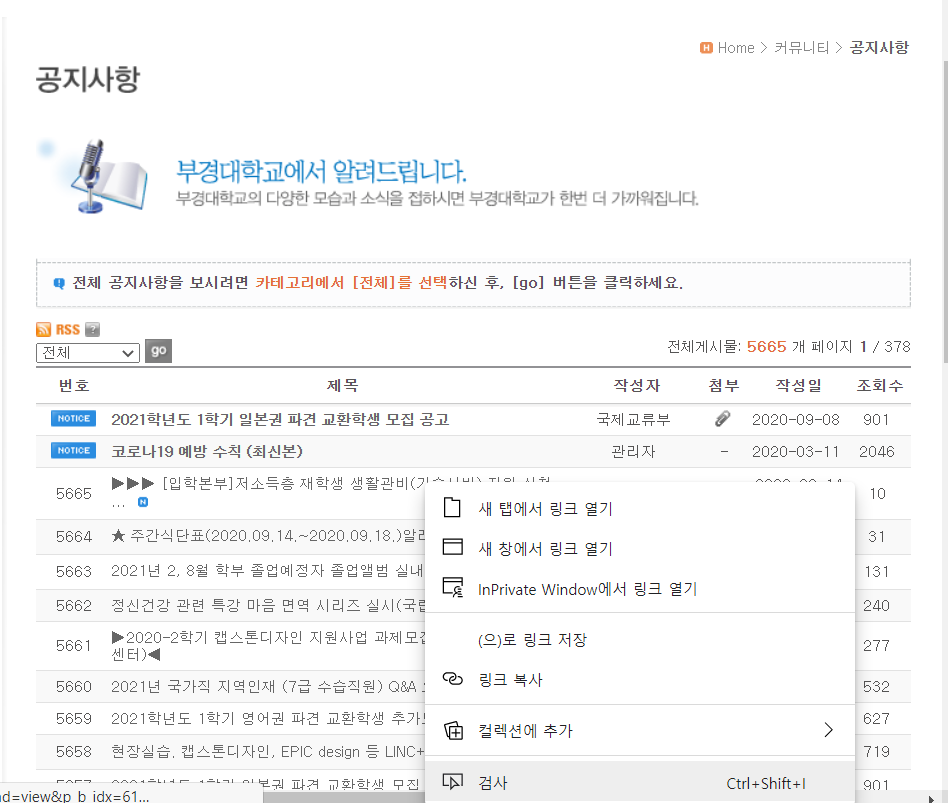

In [19]:
Image("img/pic5.png")

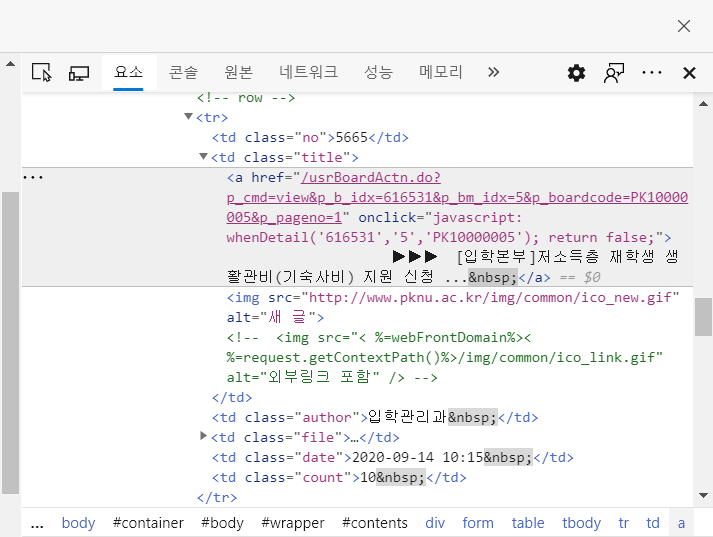

In [20]:
Image("img/pic6.png")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

역시나 우리가 검색하고자 하는 게시물 위에 커서를 두고 검사를 눌러줍시다<br>
두번 눌러야 정상적으로 뜨던데 뭔가 고장난 걸까요...음

자 자세히 들여다보면 td라는 태그에 class 이름이 title인 곳에 제목 데이터가 있네요<br>
뭐 다른 것들도 이제 보면 비슷비슷하게 근처에 있는 것 같습니다

정리해보면...
 - td 태그의 class 이름이 title : 게시글 제목
 - td 태그의 class 이름이 author : 게시글 저자
 - td 태그의 class 이름이 date : 게시글 올린 날짜
 
이것 이외에도 사실 file과 count (아마 조회수 인것 같네요) 도 있긴 하지만<br>
우리가 사용할 데이터는 아니니 패스!
 

In [ ]:
    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

자 그러면 우선은 메타데이터로 정의해서 데이터들을 select 함수로 골라줍시다

여기서 제가 저번 시간에 미흡하게 설명한 부분이 있는데<br>
뷰티풀 수프에서 select 함수를 사용할 때 태그 이름과 class를 정의해서 입력값으로 넘어가게 합니다

이론상으로 살펴보면 <b>태그[속성명=속성값]</b>이라는 구조입니다

우리는 td라는 태그 / class가 title인 정보를 찾아서 고르고자 하는 것이니까<br>
<b>td[class=title]</b>이라고 쓰게 되는 것입니다

물론 다른 정보들도 저장해야하니까 다른 것들도 알맞게 정의해줍시다

In [ ]:
    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        print("title : " + tag1.text.strip())
        print("author : " + tag2.text)
        print("time : " + tag3.text)
        print("-" * 20)

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

자 이제 제목 / 저자 / 날짜의 모든 데이터를 가져오는 데 성공하였습니다

근데 문제는 이 데이터들이 순차적으로 하나의 zip 파일처럼 되어있기 때문에<br>
하나씩 하나씩 가져와야 하는데요

for문을 써서 동시에 3개의 zip 파일에서 하나씩 불러와야 합니다<br>
약간 설명하자면 3개의 학급에서 1명씩 호출해서 불러오는 형태라고 보시면 될 것 같네요

그러면 이것을 어떻게 해결하느냐?

***

파이썬에서는 여러개의 리스트나 집합 자료구조에서 하나씩 동시에 불러와야 할 때<br>
zip 함수를 이용해서 하나의 형태로 묶어주는 함수를 사용한 다음<br>
for문에서 여러 개의 변수에 알아서 unpacking해주는 방법을 사용합니다

여기 웹 크롤링뿐만 아니라 여러가지 알고리즘이나 다른 형태에서도 자주 사용하시는 형태니까<br>
꼭 기억해두시길 바랍니다!

***

그래서 저는 tag1 / tag2 / tag3에 알아서 풀어주는 형태로 진행하였고<br>
각각 변수에서 text 함수를 이용하여 텍스트 데이터만 추출할 수 있도록 하였습니다

다만 제목과 저자에는 불필요한 공백이 많이 삽입되어 있어 strip()으로 조금 크기를 줄여주는 방식을 택했습니다

맨 밑에 -를 이용해서 구분자를 넣어주었는데 뭔가 초보스럽네요...<br>
뭐 보기에는 깔끔하게 한다고 넣어주긴 했지만...

In [ ]:
driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

저번과 마찬가지로 한 페이지에서 모든 정보를 긁어오고 정리하는 데에 성공하였다면<br>
이제 다음 페이지로 넘어갈 차례입니다

위에서 하신 방법처럼 동일하게 2페이지로 넘어가는 버튼의 Xpath를 조사해본 다음<br>
3페이지 / 4페이지... 도 한번 조사해봅시다

***

아마 이렇게 나올거에요

 - 2페이지 버튼 Xpath: //*[@id="contents"]/div[4]/div[2]/a[3]
 - 3페이지 버튼 Xpath: //*[@id="contents"]/div[4]/div[2]/a[4]
 - 4페이지 버튼 Xpath: //*[@id="contents"]/div[4]/div[2]/a[5]
 
뒤에 a[3] / a[4] / a[5] 이런 식으로 반복되는 형태가 보이네요

그렇다면 저번과 마찬가지로 링크 앞쪽은 떼서 따로 보관하고<br>
우리가 조작해야 하는 3 / 4 / 5 변수는 현재 진행중인 for문의 i 변수를 재활용하는 방식을 선택합시다

i가 0일때 우리가 가야할 곳은 3이니까<br>
i+3으로 지정해서 문자 형태로 casting하고 넣어준 다음 괄호를 씌워서 링크를 완성시켜볼게요

그리고 남은건 역시나 click()을 이용해서 클릭!

In [ ]:
t.sleep(5)
driver.close()

모든 과정이 종료되면 언제나 강조한 바와 같이<br>
close() 함수를 통해서 안전하게 종료하는 과정을 거칩시다

In [27]:
from bs4 import BeautifulSoup
from selenium import webdriver

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지나 검색할까요? : "))

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)

t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        print("title : " + tag1.text.strip())
        print("author : " + tag2.text)
        print("time : " + tag3.text)
        print("-" * 40)

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 장학금
총 몇 페이지나 검색할까요? : 3
title : 2021학년도 1학기 일본권 파견 교환학생 모집 공고
author : 국제교류부 
time : 2020-09-08 
--------------------
title : 2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내
author : 학사관리과 
time : 2020-09-03 
--------------------
title : 2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
author : 학생복지과 
time : 2020-08-21 
--------------------
title : 2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내
author : 재무과 
time : 2020-08-12 
--------------------
title : 2020-2학기 재(복)학생 등록금 납부 안내<수업연한경...
author : 재무과 
time : 2020-07-26 
--------------------
title : 코로나19 예방 수칙 (최신본)
author : 관리자 
time : 2020-03-11 
--------------------
title : [채용공고] 부경대학교 4차 산업혁명 혁신선도대학 사업단 교육지원 ...
author : 4차 산업혁명 혁신선도대학 사업단 
time : 2020-09-14 13:47 
--------------------
title : 2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...
author : 학생복지과 
time : 2020-09-14 13:32 
--------------------
title : 입시업무 지원 일용직원 채용공고
author : 입학관리과 
time : 2020-09-14 13:28 
--------------------
title : ▶▶▶  [입학본부]저소득층 재학생 생활관비(기숙사비) 지원 신청 ...
author : 입학관리과 
time : 

여기까지 하셨다면 이제 잘 되는 지 확인해봅시다!<br>
 - 참고로 input()의 질문이 조금 중의적인 것 같아 조금 수정하였습니다
 - 구분자가 조금 짧아서 2배로 늘렸습니다

***

자 이제 검색을 구현해야하는데요... 음...

지금 과정에서는 정보를 다 읽고 - 새로 로드하는 구조이기때문에
전에 있던 데이터들은 날라가게 됩니다

그렇기때문에 검색 결과를 상단에 배치하고 전체 결과를 하단에 배치하는 형식은 불가능합니다<br>
전에 있던 결과들을 어딘가에 저장해야 나중에 전체 결과들을 모아서 하단에 배치할 수 있으니까요

그렇기때문에... 음...

전체 결과를 상단에 띄우고 하단에 새로운 구분자를 넣어서 출력하는 방식 외에는 답이 없어 보이는군요<br>
여러분들은 더 나은 방식을 꼭 찾길 바랍니다 흑흑<br>
혹시나 좋은 피드백이 있으면 댓글 부탁드립니다


In [ ]:
result = []

if find_data in result:
    result.append([제목,저자,날짜])
    
for seq in result:
    print(seq.[0],seq.[1],seq.[2])

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

일단은 제목 / 저자 / 날짜를 저장할 리스트 형태의 데이터를 선언해줍시다

그 다음으로... 검색 결과에 맞는 데이터가 있으면 여기에 리스트 형태로 넣어주는 구조로 진행해보겠습니다<br>
리스트 안에 리스트이기 때문에 이중 리스트라고 보시면 될 것 같네요

결과를 찾아내고 리스트를 정리하였다면<br>
순차적으로 접근해서 결과를 출력하면 되겠네요

In [37]:
from bs4 import BeautifulSoup
from selenium import webdriver

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
result = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        if find_data in tag1.text.strip():
            result.append([tag1.text.strip(),tag2.text,tag3.text,i+1])
            
        print(tag1.text.strip(),"|",tag2.text,"|",tag3.text)
        print("-" * 100)

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

print("<검색 결과는 다음과 같습니다>\n")
for seq in result:
    print("제목 : ",seq[0])
    print("부서 : ",seq[1])
    print("날짜 : ",seq[2])
    print("페이지 : ",seq[3])
    print("-" * 100)

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 장학
총 몇 페이지를 검색할까요? : 2
정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업) | 학생상담센터  | 2020-09-11 
----------------------------------------------------------------------------------------------------
2021학년도 1학기 일본권 파견 교환학생 모집 공고 | 국제교류부  | 2020-09-08 
----------------------------------------------------------------------------------------------------
2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내 | 학사관리과  | 2020-09-03 
----------------------------------------------------------------------------------------------------
2020학년도 학부 코로나19 특별장학금 신청 안내(2차) | 학생복지과  | 2020-08-21 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내 | 재무과  | 2020-08-12 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 납부 안내<수업연한경... | 재무과  | 2020-07-26 
----------------------------------------------------------------------------------------------------
코로나19 예방 수칙 (최신본)

아까 위에서 작성한 코드들을 적재적소에 배치합시다<br>
하면 할수록 가시성이 떨어져 보이는 건... 조금 아쉽네요... 이런...

***

하면서 조금 수정한 바는 다음과 같습니다
 - 전체 결과를 한 줄로 / 검색 결과를 두 줄로 하도록 하였습니다
 - 검색 결과에 몇 페이지에 있는 지 넣어주는 게 좋을 것 같아 더 수정하였습니다
 - 구분자 길이를 연장하였습니다
 - 전체 결과의 구분자를 교체하였습니다
 
마지막으로 아쉬운 건 notice 결과때문에 각 페이지마다 중복 검색 결과가 뜨는 게 조금 아쉽습니다<br>
result에 데이터를 넣을 때 검사를 하거나 result에서 데이터를 꺼낼 때 중복을 제거할 수 있긴 한데...<br>
그러면 또 코드가 난장판이 될 것 같네요... 휴...

방금 또 떠오른 거지만 링크를 연동해서 아예 콘솔 창에서 좁ㅅ

***

여기까지 부경대 웹 홈페이지에서 공지사항 데이터들을 뽑아보자 였습니다<br>
감사합니다!